In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

from qlfhosts.GLFs import Ananna22

In [2]:
glf = Ananna22()

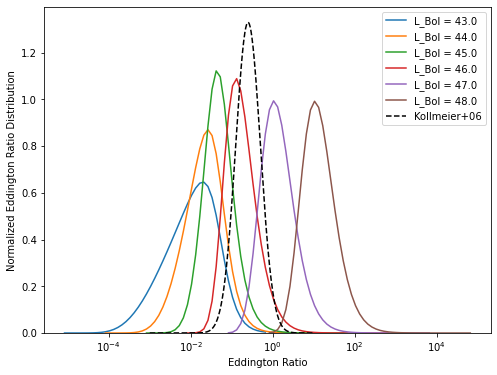

In [3]:
fig, ax = plt.subplots(1, figsize=(8,6))

log_MBH_min = 5.
log_MBH_max = 10.
log_MBH = np.arange(log_MBH_min,log_MBH_max,0.1)
log_Lbols = np.arange(43,48.1,1.)
for log_Lbol in log_Lbols:
  log_lam_e = log_Lbol - log_MBH - 38.18
  edd_rat_dist = glf.func(log_MBH, log_Lbol)
  norm = quad(glf.func, log_MBH_min, log_MBH_max, args=(log_Lbol))[0]
  edd_rat_dist /= norm
  ax.plot(10.**log_lam_e, edd_rat_dist, '-', label=r'L_Bol = {}'.format(log_Lbol))
k06_log_edd_rat = np.arange(-3,1.,0.01)
k06_mu = np.log10(0.25)
k06_sig2 = 0.3**2
k06_edd_rat_dist = (1./(2.*np.pi*k06_sig2)**0.5) * np.exp(-0.5*(k06_log_edd_rat-k06_mu)**2/k06_sig2)
plt.plot(10**k06_log_edd_rat, k06_edd_rat_dist, 'k--',label='Kollmeier+06')
ax.plot()
ax.legend()
ax.set_xscale('log')
ax.set_ylabel('Normalized Eddington Ratio Distribution')
ax.set_xlabel('Eddington Ratio')
ax.set_ylim([0.,ax.get_ylim()[1]])
plt.show()